## Lesson 1. Open, Plot and Explore Lidar Data in Raster Format with Python

### Work with Lidar Raster Data in Python - Earth analytics python course module
Welcome to the first lesson in the Work with Lidar Raster Data in Python module. This module introduces the raster spatial data format as it relates to working with lidar data in Python. Learn how to to open, crop and classify raster data in Python.

**In This Lesson**

* Learning Objectives
* What You Need
* Open Raster Data in Python
* Context Manager to Open/Close Raster Data
* Raster Plots with Matplotlib
* Plot Numpy Array
* Adjust Plot Extent to “Zoom in” on Your Raster Data

### Learning Objectives

After completing this tutorial, you will be able to:

* Open a lidar raster dataset in Python.
* Be able to list and define 3 spatial attributes of a raster dataset: extent, crs and resolution.
* Be able to identify the resolution of a raster in Python.
* Be able to plot a lidar raster dataset in Python.

In the last lesson, you reviewed the basic principles behind what a lidar raster dataset is in Python and how point clouds are used to derive the raster. In this lesson, you will learn how to open a plot a lidar raster dataset in Python. You will also learn about key attributes of a raster dataset:

1. Spatial resolution
2. Spatial extent and
3. Coordinate reference systems

![Markdown Logo is here](https://www.earthdatascience.org/images/courses/earth-analytics/lidar-raster-data-r/gridding.gif)
Animation that shows the general process of taking lidar point clouds and converting them to a Raster Format. Source: Tristan Goulden, NEON.

### Open Raster Data in Python

You can use the `rasterio` library combined with `numpy` and `matplotlib` to open, manipulate and plot raster data in `Python`.

In [7]:
# import the nessesary python packages

import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os
plt.ion()

# change working directory
os.chdir("/Users/markb/earth-analytics/")

from shapely.geometry import Polygon, mapping
from rasterio.mask import mask
# a packages created for this will be discussed later in this lesson
import earthpy as et

# set standard plot parameters for uniform plotting
plt.rcParams['figure.figsize'] = (8, 8)

# prettier plotting with seaborn
import seaborn as sns;
sns.set(font_scale=1.5)
sns.set_style("white")


Note that you imported the `rasterio` library using the shortname rio.

Now, you can use the `rio.open("path-to-raster-here")` function to open a raster dataset.

In [9]:
# open raster data
lidar_dem = rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

To check your data, you can query the spatial extent of the data using the attribute `.bounds`.

You can also quickly plot the raster using the `rasterio` function called `show()`. The function argument `title = "Plot title here"` adds a title to the plot.

In [12]:
# query the spatial extent of the data
lidar_dem.bounds

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

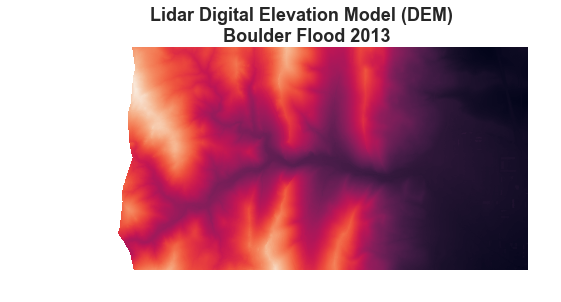

In [13]:
# plot the dem using raster.io
fig, ax = plt.subplots()
show(lidar_dem,
    title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
    ax=ax)
ax.set_axis_off()

A plot of Lidar derived digital elevation model for Lee Hill Road in Boulder, CO

#### Opening and Closing File Connections

The rasterio library is efficient as it establishes a connection with the raster file rather than directly reading it into memory. Because it creates a connection, it is important that you close the connection after it is opened AND after you’ve finished working with the data!

In [16]:
# close the connection
lidar_dem.close()

# this returns an error as you have closed the connection to the file
# show(lidar_dem)

Once the connection is closed, you can no longer work with the data. You’ll need to re-open the connection. Like this:

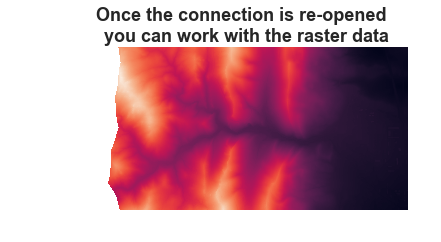

In [17]:
# open raster data connection - again
lidar_dem = rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

fig, ax = plt.subplots(figsize = (8, 3))
show(lidar_dem,
    title = "Once the connection is re-opened \n you can work with the raster data", 
    ax=ax)
ax.set_axis_off()

A plot of a Lidar derived digital elevation model for Lee Hill Road in Boulder, CO.

In [18]:
# close dem connection
lidar_dem.close()

#### Context Manager to Open/Close Raster Data

A better way to work with raster data in `rasterio` is to use the context manager. This will handle opening and closing the raster file for you.

`with rio.open('name of file') as src: src.rasteriofunctionname`

In [19]:
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    print(src.bounds)

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


With a context manager, you create a connection to the file that you’d like to open. However, once your are outside of the `with` statement, that connection closes. Thus you don’t have to worry about opening and closing files using this syntax.

In [20]:
# note that the src object is now closed
src

<closed DatasetReader name='data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>

#### Raster Plots with Matplotlib

Above you used the `show()` function to plot a rasterio object. Show “wraps” around the python `matplotlib` plotting library to produce a plot.

However, you will explore plotting a numpy array with `matplotlib` directly. Using matplotlib allows you to fully customize your plots.

To plot using matplotlib directly you:

1. open the raster
2. `create a spatial_extent` object that contains the boundary information needed to plot your raster in space using rio.plot.plotting_extent
3. Read in the raster data itself into a numpy array using `.read()`

In [21]:
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # convert / read the data into a number array
    lidar_dem_im = src.read()
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    # get bounds of object
    bounds = src.bounds

You can use the `rio.plot.plotting_extent` function to create a spatial extent in the format that `matplotlib` needs to plot your raster.

#### Spatial Extents and Plotting

The bounding box output - which represents the spatial extent of your raster, is provided to use in a `rasterio` specific format. To plot with matplotlib, you need to provide a vector that contains the spatial extent in the following format:

`[left, right, bottom, top]`

However, if you just use the `.bounds` object that rasterio provides, the numbers are not in the correct order. You can use `rio.plot.plotting_extent(rasterio-object-name-here)` function to get a spatial extent in the format that matplotlib requires

In [22]:
# this is the format that matplotlib wants
print("spatial extent:", spatial_extent)

# this is the format that rasterio provides with the bounds attribute
print("rasterio bounds", bounds)

spatial extent: (472000.0, 476000.0, 4434000.0, 4436000.0)
rasterio bounds BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


#### Read Files with Rasterio into Numpy

Next let’s explore how you read in a raster using rasterio. When you use `.read()`, rasterio imports the data from your raster into a `numpy array`.

Remember that a `numpy array` is simply a matrix of values with no particular spatial attributes associated with them. `Numpy arrays` are, however, a very efficient structure for working with large and potentially multi-dimensional (layered) matrices.

In [23]:
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    #convert / read the data into a numpy array : masked=True turns 'nodata' values to nan
    lidar_dem_im = src.read(1, masked=True)
    #create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    
print("object shape:", lidar_dem_im.shape)
print("object type:", type(lidar_dem_im))

object shape: (2000, 4000)
object type: <class 'numpy.ma.core.MaskedArray'>


Below you read in the data using `src.read` where `src` is the name of the object that you defined within the context manager and `read(1)` reads in just the first layer in your raster. Specifying the `1` is important as it will force rasterio to import the raster into a 2 dimensional vs a 3 dimensional array.

See the example below

In [24]:
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # convert / read the data into a numpy array
    lidar_dem_im2 = src.read(1)

with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # convert / read the data into a numpy array
    lidar_dem_im3 = src.read()
    
print("Array Shape using read(1):", lidar_dem_im2.shape)
# note that without the (1) your numpy array has a third dimension
print("Array shape using read()", lidar_dem_im3.shape)

Array Shape using read(1): (2000, 4000)
Array shape using read() (1, 2000, 4000)


Also notice that you used the argument `masked=True` in your `.read(`) statement. This sets all `nodata` values in your data to nan which you will want for plotting!

#### Plot Numpy Array

Finally, you can plot your data using `imshow()`. Notice that you provide `imshow()` with the `spatial_extent` object that you created above to ensure that the x and y axis represent the pixel locations of your raster data.

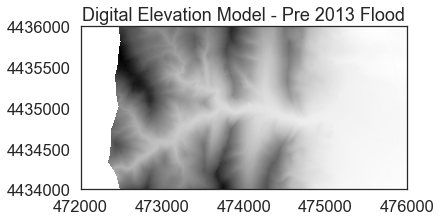

In [26]:
fig, ax = plt.subplots(figsize = (8,3))
ax.imshow(lidar_dem_im,
         cmap = 'Greys', 
         extent = spatial_extent)

ax.set_title("Digital Elevation Model - Pre 2013 Flood");

A plot of a Lidar derived digital elevation model for Lee Hill Road in Boulder, CO with a grey color map applied.

Let’s plot again but this time you will:

1. add a colorbar legend
2. turn off the annoying matplotlib message by adding a semicolon `;` to the end of the last line
3. turn off the axes given you don’t need the coordinates in your plot
4. increase the title font size using the `as.set_title` function and the `fontsize` argument

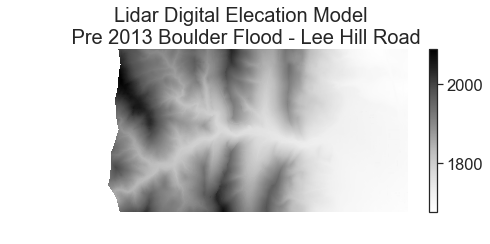

In [30]:
fig, ax = plt.subplots(figsize = (8, 3))

lidar_plot = ax.imshow(lidar_dem_im,
                      cmap = 'Greys', 
                      extent = spatial_extent)

ax.set_title("Lidar Digital Elecation Model \n Pre 2013 Boulder Flood - Lee Hill Road", fontsize = 20)

fig.colorbar(lidar_plot)

# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show();

A plot of a Lidar derived digital elevation model for Lee Hill Road in Boulder, CO with a colorbar.

***
#### *Color Ramps

To plot you can select pre-determined color ramps from matplotlib, you can reverse a color ramp by adding `_r` at the end of the color ramps name, for example `cmap = 'viridis_r'`.
***

#### Explore Raster Data Values with Histograms

Next, you will explore a histogram of your data. A histogram is useful to help you better understand the distribution of values within your data. In this case given you are looking at elevation data, if there are all small elevation values and the histogram looks uniform (not too much variation in values) you can assume that your study area is relative “flat” - not too hilly. If there is a different distribution of elevation values you can begin to understand the range of elevation values in your study area and the degree of difference between low and high regions (i.e. is it flat or hilly?). Is it high elevation vs low elevation?

In [32]:
lidar_dem_im

masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,
         1695.429931640625],
        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,
         1695.3599853515625],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.3699951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

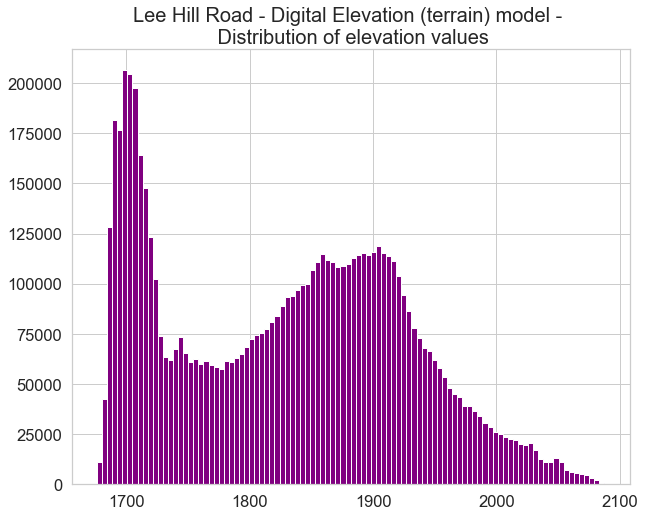

In [33]:
# use seaborn styles
sns.set_style("whitegrid")

# plot histogram
fix, ax = plt.subplots(figsize = (10, 8))
ax.hist(lidar_dem_im.ravel(),
        bins = 100,
        color = 'purple')
ax.set_title("Lee Hill Road - Digital Elevation (terrain) model - \n Distribution of elevation values",
            fontsize = 20);

A histogram of lidar derived elevation values for Boulder, CO

#### Adjust Plot Extent to “Zoom in” on Your Raster Data

If you want to quickly zoom in on a portion of your raster data, you can adjust the x and y spatial extents of your matplotlib plot. To do this, you will create a new spatial extent that is smaller than the original spatial extent of the data.

In [35]:
# create a new spatial extent
print("Full Spatial extent of raster:", spatial_extent)

# define a spatial extent that is 'smaller'
zoomed_extent = [472500, 473030, 4434000, 4435030]
print("Zoomed in raster extent:", zoomed_extent)

Full Spatial extent of raster: (472000.0, 476000.0, 4434000.0, 4436000.0)
Zoomed in raster extent: [472500, 473030, 4434000, 4435030]


Next you’ll define a box which you’ll focus on. You’ve provided a small helper function that lets you give the x and y limits of a box, and it returns the x,y points corresponding to four corners of this box. It then returns a 'shapely' polygon object.

In [40]:
# define the four corners of the box
box = et.utils.bounds_to_box(*zoomed_extent)
box

AttributeError: module 'earthpy.utils' has no attribute 'bounds_to_box'

NameError: name 'box' is not defined

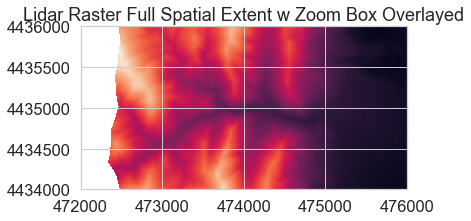

In [39]:
# plot the original data with the boundary box
fig, ax = plt.subplots(figsize = (8, 3))
ax.imshow(lidar_dem_im, 
         extent = spatial_extent)
ax.set_title("Lidar Raster Full Spatial Extent w Zoom Box Overlayed")

x, y = box.exterior.xy
ax.plots(x, y, '-', lw=3, color = 'r')
ax.set_axis_off()

# plot the data but set the x and y lim
fig, ax = plt.subplots(figsize = (8, 3))
ax.imshow(lidar_dem_im,
         extent = spatial_extent)
ax.set_title("Lidar Raster Zommed on a Smaller Spatial Extent")

# set x and y limits of the plot
ax.set_xlim(zoomed_extent[12])
ax.set.ylim(zoomed_extent[2:4])
ax.plit(x, y, '-', lw = 3, color = 'r')
ax.set_axis_off(0)